# HTUR2 Data Set

### Definição do problema

Dataset utilizado para detectar pulsars no espaço.
Fonte: https://archive.ics.uci.edu/ml/datasets/HTRU2

Pulsar é um corpo estelar magnetizado rotacional que emite raios de radiação eletromagnética. Esses raios são apenas detectados por sensores quando o corpo tem sua direção apontada para a Terra (pondendo ser fenômenos repetitivos ou não, como um farol). Sua utilidade se dá pela capacidade de confirmação indireta da existência de gravidade em um sistema pela sua presença. Com gravidade confirmada, novos planetas podem ser encontrados junto de sua detecção.

O dataset HTUR2 foi coletado a partir de satélites sensoriais apontados para o espaço para mapeamento de surveys (mapas de dados astronômicos). Por ele, cadidatos a pulsars foram identificados e formulados como dataset para classificação. Os rótulos possíveis são '0' para "non-pulsar" e '1' para "pulsar", sendo binário.

#### Informações dos dados

* Instâncias - 17898
* Atributos - 9
* Data - 14/02/2017

#### Informações dos atributos

Composto por 4 estatísticas do perfil integrado (vetor de variáveis contínuas que descrevem a versão do sinal em longitude resolvida pela média de tempo e frequência) e 4 estatísticas iguais mas baseadas na curva DM-SNR (Delta Modulation Signal to Noise Ratio) dos sinais. E finalmente, a classe do corpo.

* `mean` - Média do perfil integrado.
* `standard_deviation` - Desvio padrão do perfil integrado.
* `excess_kurtosis` - Excesso de curtose do perfil integrado.
* `skewness` - Distorção do perfil integrado.
* `dm_snr_mean` - Média da curva DM-SNR.
* `dm_snr_standard_deviation` - Desvio padrão da curva DM-SNR.
* `dm_snr_excess_kurtosis` - Excesso de curtose da curva DM-SNR.
* `dm_snr_skewness` - Distorção da curva DM-SNR.
* `class` - Classe

### Detalhamento de User Story

Software para identificação de corpos estelares a partir de surveys (mapas astronômicos)

US01 - Como usuário quero filtrar o survey para visualizar possíveis pulsars e diminuir a região de exploração

* ML Objectives

    - **ML Problem and Context**: Classificação
    - **Organizational Goals**: Aumento da detecção de pulsars em 50% 
    - **User Goals**: Permitir que usuários da plataforma possam identificar pulsars a fins de diminuição do espaço para identificação de planetas extrasolares
    - **Model Goals**: Acurácia > 95%. Precisão > 90%. Recall > 80%.
    - **ML Functionality**: Classificar corpo estelar como pulsar ou não-pulsar
    - **Leading Indicators**: Crescimento na demarcação de mapas estelares com possíveis planetas extrasolares
    - **Customer Expectations**: Previsões estejam certar 90% das vezes

* User experience

    - **Accountability**: Astronômo líder
    - **Cost**: Identificado pulsar com falso verdadeiro e demarcação de região inválida
    - **Forcefulness**: O sistema do modelo realiza a classificação toda vez que a filtragem de pulsar é acionada
    - **Frequency**: O sistema do modelo interage toda vez que uma nova filtragem de pulsar é selecionada
    - **Interactiveness**: É necessário a adição dos surveys (mapas estelares) constantemente para alimentar o modelo
    - **Value**: Demarcações de espaços para identificação de planetas mais rápido e com mais precisão
    - **Visualization**: dashboard com o histórico de mapas estelares com demarcações semelhantes

* Infrastructure

    - **Data Streaming**: Transporte de dados em lotes
    - **Execution Engine**: O sistema do modelo estará sendo executado como um back-end, na nuvem, para a interface de usuário
    - **Incremental Learning**: O modelo deve aprender constantemente sobre os dados de cada survey já adicionado
    - **Integration**: A interface web fará uma requisição para o back-end que serve classificações baseadas nos dados do survey
    - **Safety**: O serviço back-end do modelo estará sendo executado em cluster, colocando redundância em caso de problemas por alguma execução da instância falhada (ou no momento de entrega de uma nova versão); Se o mesmo serviço estiver indisponível ou mostrando valores indevidos, a classificação não será mostrada na interface de usuário
    - **Security**: O serviço de back-end estará protegido por um API Gateway com autenticação por JWT (Json Web Token) e não retornará qualquer outro valor a não ser a classificação dos pulsar no mapa em avaliação; O tráfego de dados não estará exposto a rede pública, mas por uma conexão privada pela rede interna evitando o acesso de outras fontes que não sejam a interface de usuário
    - **Storage**: Modelos e scripts são armazenados no repositório de gerência de configuração da equipe de Dados e Plataforma. Os dados estão disponíveis no Datalake central da mesma equipe
    - **Telemetry**: Identificação de quantas vezes o ponteiro passa pelos limites da caixa de classificação na interface; Qual o tempo para apresentar a classificação

* Model

    - **Algorithm**: Random Tree
    - **Explainability**: O modelo deve se utilizar das informações do survey para ajudar na tomada de decisão para classificação do corpo estelar
    - **Inference Time**: 100 milisegundos
    - **Input \ Output**: A entrada é resultado da pesquisa de informações para treinamento no Datalake do banco com dados dos mapas. A saída são os rótulos de “pulsar ou “não-pulsar" numa nova coluna “classe” da entrada
    - **Learning Time**: 500 milisegundos
    - **Maintainability**: O modelo deve passar por uma atualização diárias baseada nas informações de mapas adicionados; Caso seja necessária a inclusão de um novo campo de informação é necessário atualizar a documentação de entradas
    - **ML Problem Type**: Classificação
    - **Model Performance**: Acurácia > 95%. Precisão > 90%. Recall > 80%.
    - **Model Size**: Tempo: O(n\*logn\*d), sendo d as dimensões. Tamanho: O(n)
    - **Reproducibility**: As informações dos mapas são atualizadas constantemente, é necessário que o modelo seja reproduzido diariamente para estar disponível dentro da mesma janela

* Data

    - **Accuracy**: Nível de corretude dos dados deve ser alta para evitar identificações indevidas para pulsars e não-pulsars
    - **Baseline**: Astrônomos usuários apresentam mapas históricos com a presença de pulsars para armezanamento no Datalake para alimentar o modelo
    - **Bias**: São necessários mapas com dados certificados por agencias espaciais credenciadas. Evitando a contaminação do modelo por informações falsas ou indevidas
    - **Completeness**: Os mapas devem estar completos com todas as informações para identificação de pulsars
    - **Consistency**: A consistência deve ser garantida durante o processo de preparação para treinamento do modelo. Dessa forma são respeitados valores credenciados pelas agencias espaciais
    - **Credibility**: Os mapas serão utilizados somente por agencias espaciais credenciadas como parceiras
    - **Data Operations**: Rotulagem
    - **Distribution**: Treinamento em 20% e teste em 80%
    - **Ethics & Privacy**: A coleta de dados deve ser feita por meio da geração de dados de satélites de rádio-frequência utilizados pela agência e por crendiaciadas parceiras
    - **Quantity**: 100 mil de registros (por mapa)
    - **Real usage**: Facilitar a identificação de planetas extrasolares para estudo do universo
    - **Source**: Banco de mapas de agências espaciais
    - **Timeliness**: Após a alimentação no primeiro dia, os dados devem estar prontos para uso na classificação no dia seguinte para retomada de concessões.

#### Requisitos mínimos para utilização do notebook

> **Atenção** É necessária a utilização da versão 3.8.10 (ou superior) do python

```
ipykernel==6.15.0
pandas==1.4.3
matplotlib==3.5.2
seaborn==0.11.2
missingno==0.5.1
sklearn==0.0
pycodestyle==2.8.0
pycodestyle_magic==0.5
flake8==4.0.1
pytest==7.1.2
pytest-sugar==0.9.4
```

#### Instalação dos pacotes

In [ ]:
%pip -q install -r requirements.txt

### Identificando o melhor modelo de classificação de pulsars

Primeiros passos são as importações dos pacotes de uso e a utilização do filtro de warnings para um notebook mais limpo

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

### Coleta de dados
O dataset importado do UCI Respository está em arquivo CSV. É feito o seu carregamento como um Pandas Dataframe pelo seu caminho no repositório.

In [3]:
# importando dados de um csv para um dataframe

# csv a importar
csv_dados = 'HTRU_2.csv'

# labels dos atributos do dataset
atributos = [
    'mean',
    'standard_deviation',
    'excess_kurtosis',
    'skewness',
    'dm_snr_mean',
    'dm_snr_standard_deviation',
    'dm_snr_excess_kurtosis',
    'dm_snr_skewness',
    'class'
]

# carga do dataset através da url - há diversos parâmetros no read_csv que podem ser interessantes, como sep, usecols e header
pulsar_dataset = pd.read_csv(csv_dados, names=atributos)

### Análise de dados

Os seguintes passos definem a exploração do dataset para melhor entendimento

In [6]:
# visualizar as 5 primeiras linhas
pulsar_dataset.head()

,mean,standard_deviation,excess_kurtosis,skewness,dm_snr_mean,dm_snr_standard_deviation,dm_snr_excess_kurtosis,dm_snr_skewness,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# retornar o número de linhas e colunas
print(pulsar_dataset.shape)

(17898, 9)


In [5]:
# retorno do resumo sobre o Dataframe
print(pulsar_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mean                       17898 non-null  float64
 1   standard_deviation         17898 non-null  float64
 2   excess_kurtosis            17898 non-null  float64
 3   skewness                   17898 non-null  float64
 4   dm_snr_mean                17898 non-null  float64
 5   dm_snr_standard_deviation  17898 non-null  float64
 6   dm_snr_excess_kurtosis     17898 non-null  float64
 7   dm_snr_skewness            17898 non-null  float64
 8   class                      17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [6]:
# retorno do resumo estatístico do dataset
pulsar_dataset.describe()

,mean,standard_deviation,excess_kurtosis,skewness,dm_snr_mean,dm_snr_standard_deviation,dm_snr_excess_kurtosis,dm_snr_skewness,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [7]:
# retorno do número de instâncias por classes 
print(pulsar_dataset.groupby('class').size())

class
0    16259
1     1639
dtype: int64


### Visualizações unimodais

Serão utilizados gráficos para visualizações das estatísticas de forma separada

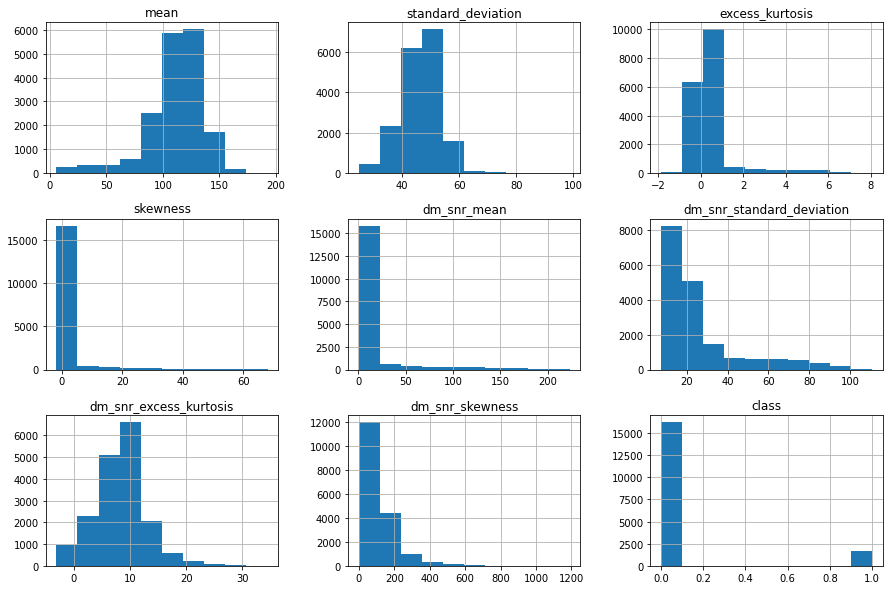

In [8]:
# Histograma
pulsar_dataset.hist(figsize = (15,10))
plt.show()

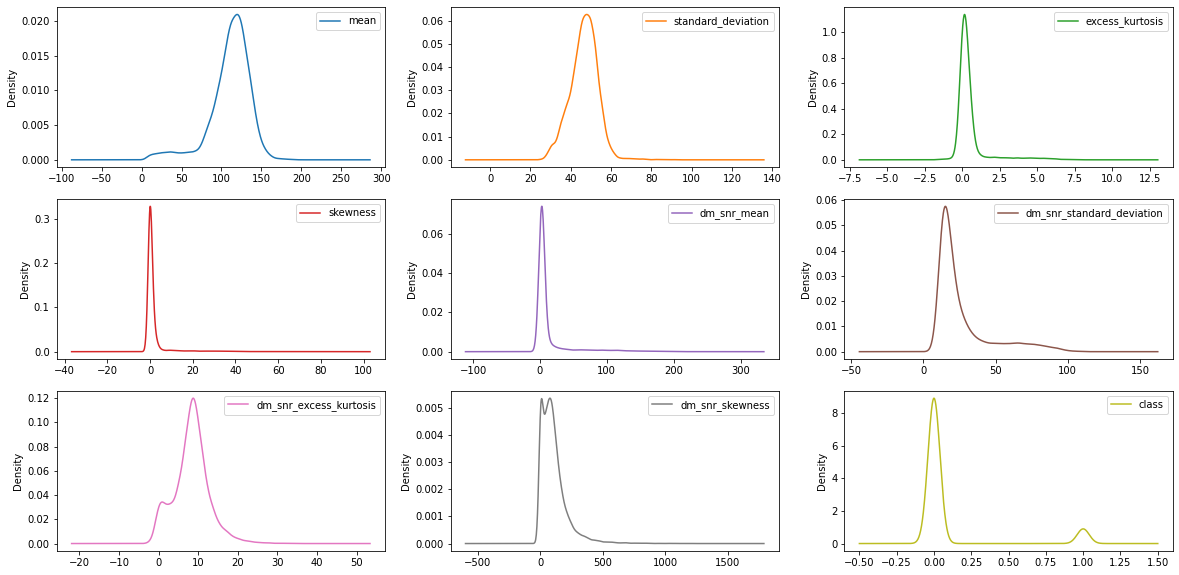

In [9]:
# Density Plot
pulsar_dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (20,10))
plt.show()

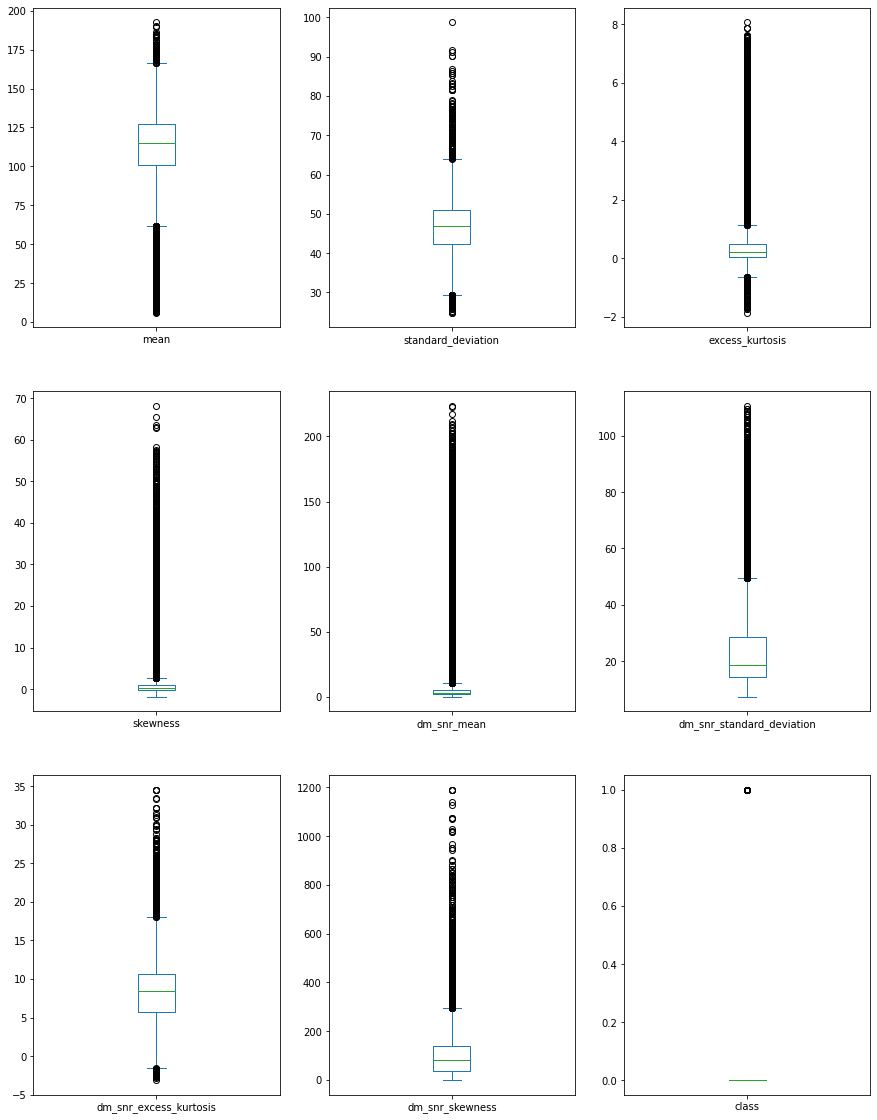

In [10]:
# Boxplot
pulsar_dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,20))
plt.show()

### Visualizações multimodais

Serão utilizados gráficos para visualizações das relações entre as estatísticas

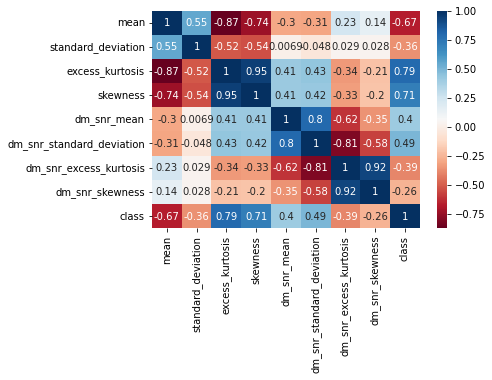

In [11]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(pulsar_dataset.corr(), annot=True, cmap='RdBu');

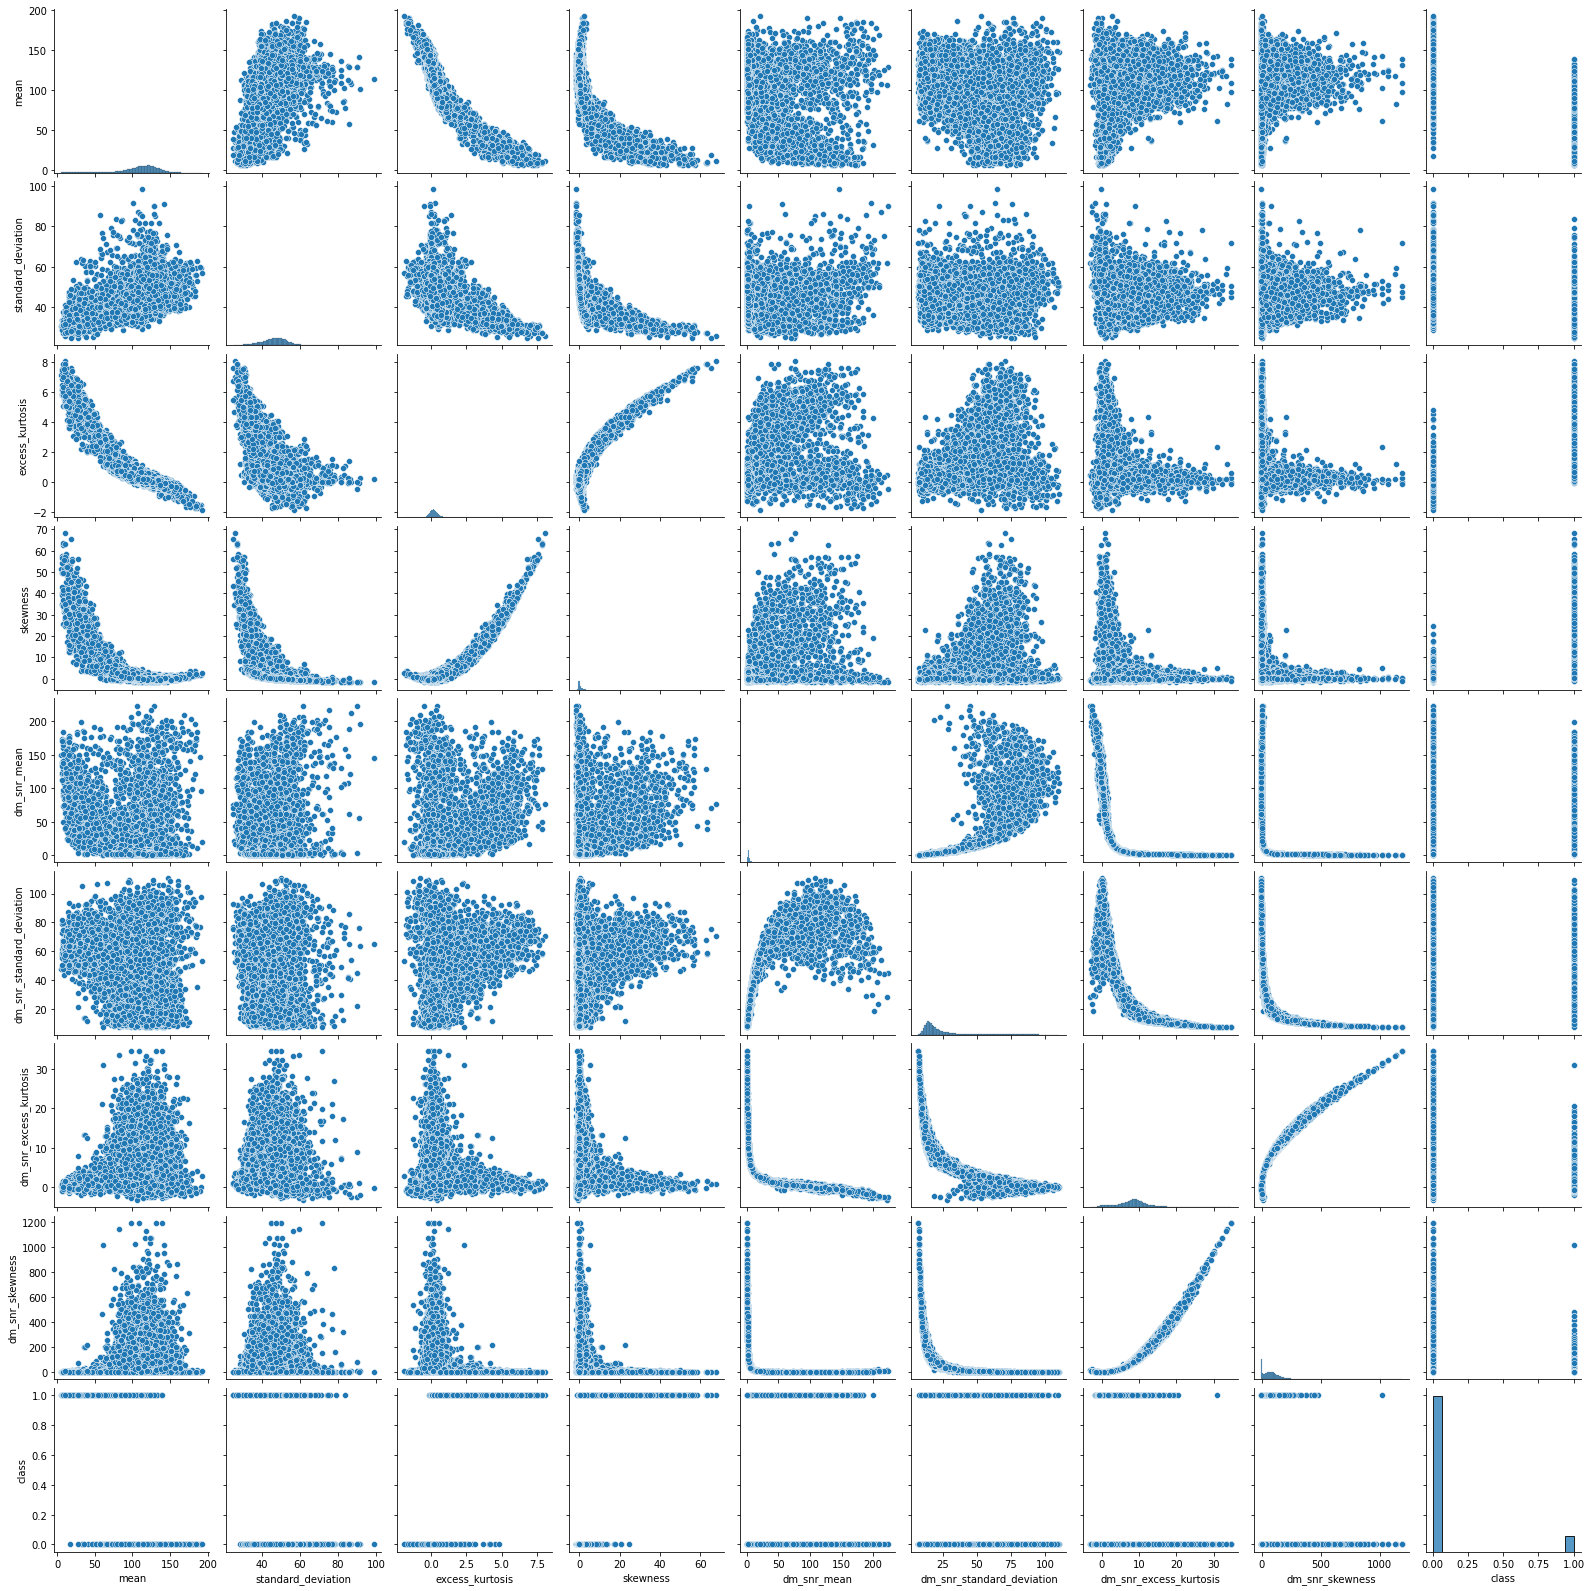

In [12]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(pulsar_dataset)

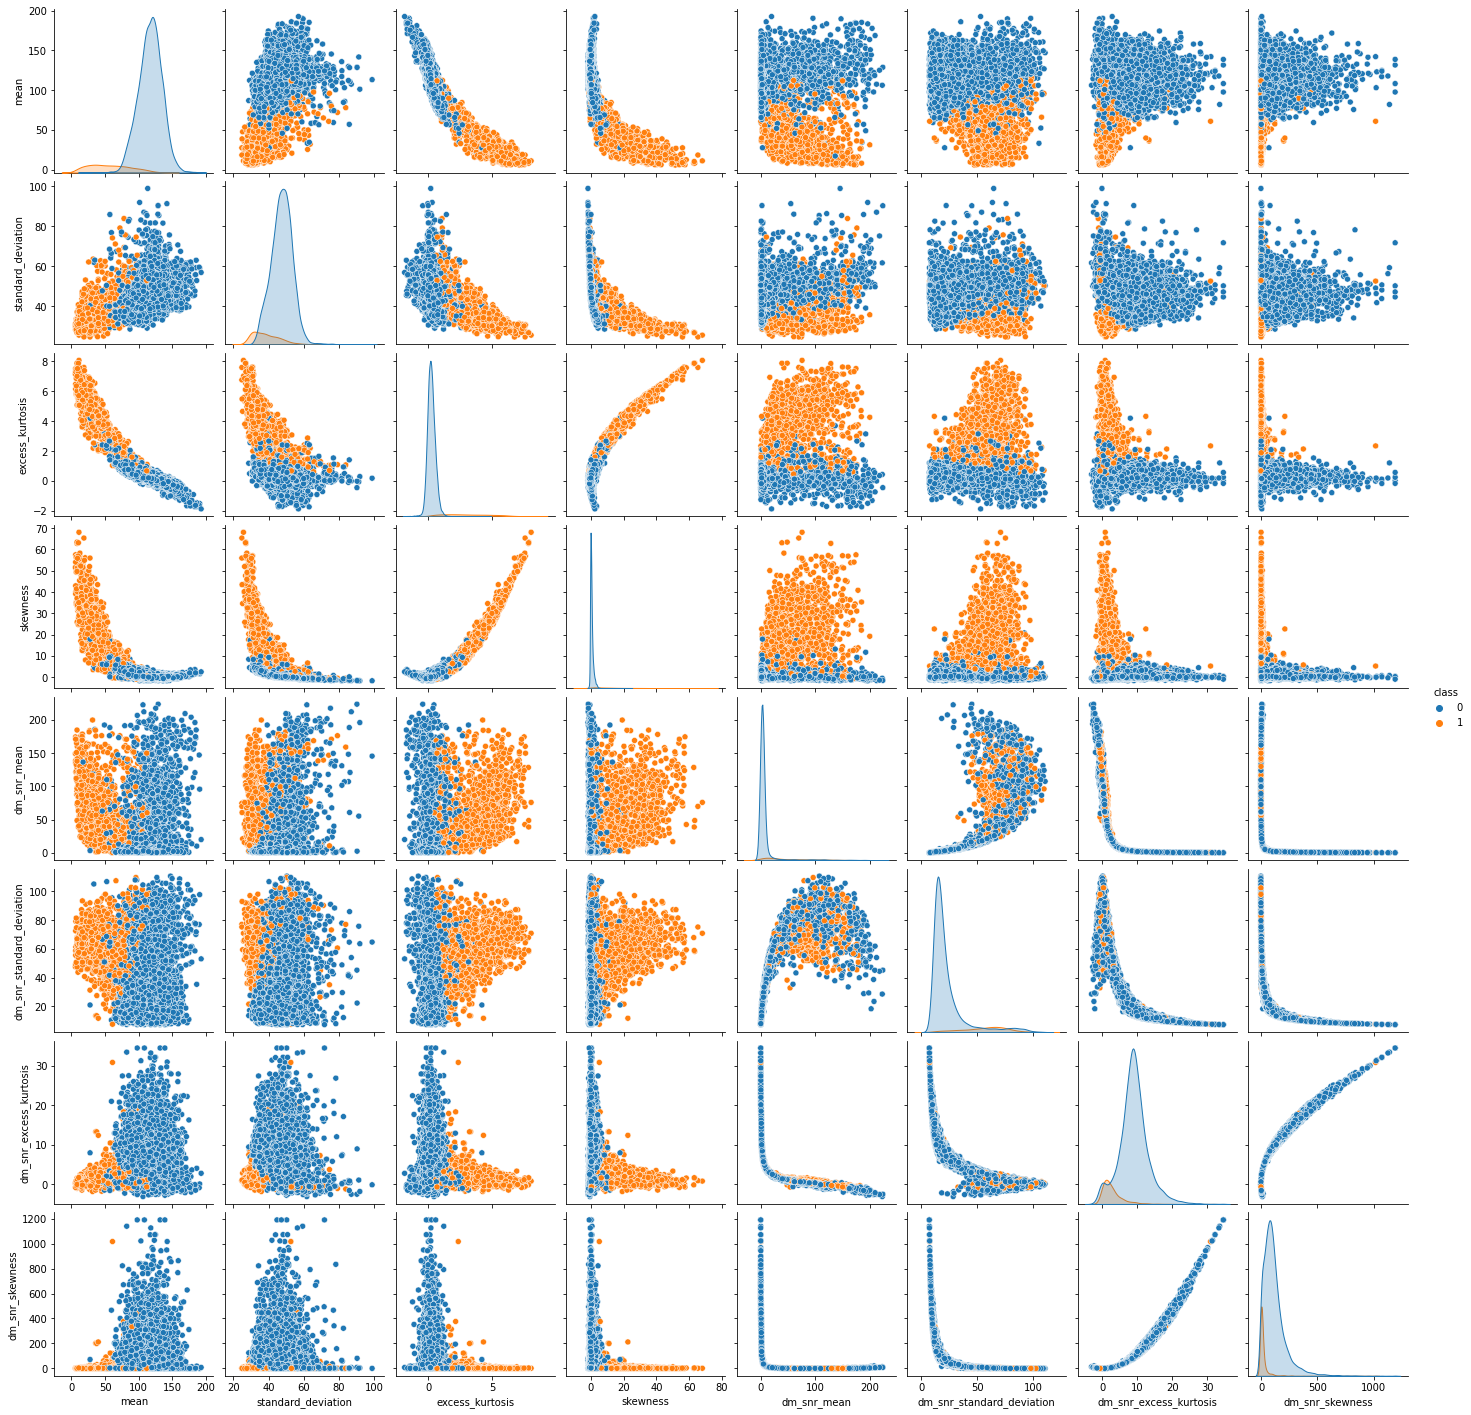

In [13]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(pulsar_dataset, hue = "class", height = 2.5);

### Pré-processamento

São utilizados métodos para a limpeza e transformação de dados caso necessário. Nesse caso somente são separados em dados de treino (80%) e teste (20%) 

In [17]:
# Separação em conjuntos de treino e teste
array = pulsar_dataset.values
X = array[:,0:8].astype(float)
Y = array[:,8]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=test_size, random_state=seed)

### Criação e avaliação dos modelos

Os modelos serão criados a partir dos parâmetros selecionados e depois manualmente comparados. Utilizando-se modelos efetivos para um problema de classificação

Métodos:

* Regressão Logística
* KNN
* Árvores de Decisão
* Naive-Bayes
* Máquina de vetores de suporte 

In [14]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [15]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [18]:
# definindo uma semente global
np.random.seed(7)

# Avaliação dos modelos
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.978838 (0.002652)
KNN: 0.972273 (0.002577)
CART: 0.969339 (0.003018)
NB: 0.945593 (0.005115)
SVM: 0.911510 (0.004900)


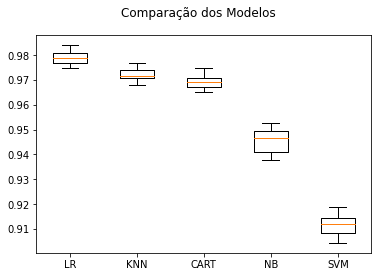

In [19]:
# Comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

#### Primeira avaliação 

Sem normalização ou padronização de dados, o melhor modelo foi a Regressão Logística

### Criação e avaliação dos modelos com dados padronizados

Para evitar as diferentes distribuições de dados, será feita a normalização para que todos os atributos fiquem com a média igual a 0 e o desvio padrão igual a 1. As pipelines ajudarão na construção automatizada para evitar os vazamento de dados entre os diferentes modelos

In [20]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.978768 (0.002934)
ScaledKNN: 0.978977 (0.002801)
ScaledCART: 0.969269 (0.003027)
ScaledNB: 0.945593 (0.005115)
ScaledSVM: 0.979047 (0.002024)


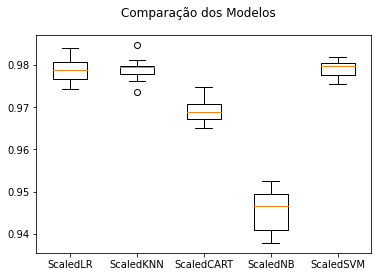

In [21]:
# Comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

#### Segunda avaliação

Com a padronização de dados, o melhor modelo foi o SVM (Máquina de vetores de suporte), melhor que a Regressão Logística sem qualquer transformação 

### Criação e avaliação dos modelos com dados normalizados

In [22]:
np.random.seed(7) # definindo uma semente global

# Normalização do dataset
pipelines = []
pipelines.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledMinMaxLR: 0.974019 (0.003403)
ScaledMinMaxKNN: 0.978488 (0.003289)
ScaledMinMaxCART: 0.969339 (0.003018)
ScaledMinMaxNB: 0.945593 (0.005115)
ScaledMinMaxSVM: 0.973600 (0.003474)


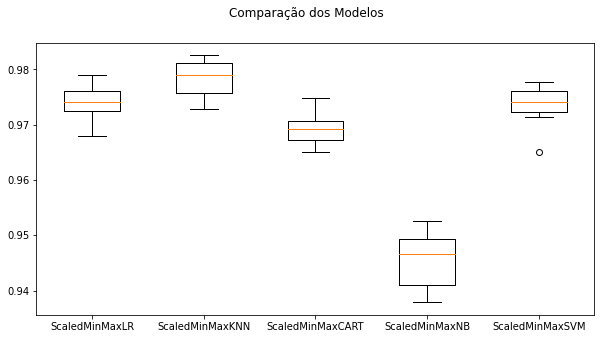

In [23]:
# Comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação dos Modelos') 
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111) 
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Comparação dos modelos

Sem tratamento:

* LR: 0.978838 (0.002778)
* KNN: 0.972273 (0.002577)
* CART: 0.969339 (0.003018)
* NB: 0.945593 (0.005115)
* SVM: 0.911510 (0.004900)

---

Com padronização:

* ScaledLR: 0.978768 (0.002934)
* ScaledKNN: 0.978977 (0.002801)
* ScaledCART: 0.969269 (0.003027)
* ScaledNB: 0.945593 (0.005115)
* ScaledSVM: 0.979047 (0.002024)

---

Com normalização:

* ScaledMinMaxLR: 0.974019 (0.003403)
* ScaledMinMaxKNN: 0.978488 (0.003289)
* ScaledMinMaxCART: 0.969339 (0.003018)
* ScaledMinMaxNB: 0.945593 (0.005115)
* ScaledMinMaxSVM: 0.973600 (0.003474)

#### Terceira avaliação

Com a normalização de dados, o melhor modelo foi o KNN, mas não melhor que a o SVM com padronização 

Até agora temos o SVM padronizado como o melhor modelo, mas ainda podemos conseguir melhores resultados com ajuste por hiperparâmetro (Como será feito no KNN e no SVM) ou ensembles

### Ajuste de Modelos

#### KNN

In [24]:
np.random.seed(7) # definindo uma semente global

# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

# Tuning do KNN

kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'knn__metric': ["euclidean", "manhattan", "minkowski"],
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)

grid.fit(X_train, Y_train)

print("Melhor: %f usando %s" % (grid.best_score_, grid.best_params_)) 

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.979257 usando {'knn__metric': 'euclidean', 'knn__n_neighbors': 7}
0.972342 (0.002658): {'knn__metric': 'euclidean', 'knn__n_neighbors': 1}
0.979117 (0.002488): {'knn__metric': 'euclidean', 'knn__n_neighbors': 3}
0.978977 (0.002801): {'knn__metric': 'euclidean', 'knn__n_neighbors': 5}
0.979257 (0.002502): {'knn__metric': 'euclidean', 'knn__n_neighbors': 7}
0.978488 (0.002069): {'knn__metric': 'euclidean', 'knn__n_neighbors': 9}
0.978628 (0.001933): {'knn__metric': 'euclidean', 'knn__n_neighbors': 11}
0.978628 (0.001540): {'knn__metric': 'euclidean', 'knn__n_neighbors': 13}
0.978698 (0.002105): {'knn__metric': 'euclidean', 'knn__n_neighbors': 15}
0.978279 (0.002086): {'knn__metric': 'euclidean', 'knn__n_neighbors': 17}
0.978628 (0.002173): {'knn__metric': 'euclidean', 'knn__n_neighbors': 19}
0.978279 (0.002265): {'knn__metric': 'euclidean', 'knn__n_neighbors': 21}
0.971295 (0.002839): {'knn__metric': 'manhattan', 'knn__n_neighbors': 1}
0.978000 (0.003081): {'knn__metric': 'manh

#### SVM

In [25]:
np.random.seed(7) # definindo uma semente global

# Tuning do SVM

kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'svc__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.979327 usando {'svc__C': 1.3, 'svc__kernel': 'rbf'}
0.978559 (0.003028): {'svc__C': 0.1, 'svc__kernel': 'linear'}
0.973530 (0.003340): {'svc__C': 0.1, 'svc__kernel': 'poly'}
0.977511 (0.002116): {'svc__C': 0.1, 'svc__kernel': 'rbf'}
0.874564 (0.009051): {'svc__C': 0.1, 'svc__kernel': 'sigmoid'}
0.978908 (0.002893): {'svc__C': 0.3, 'svc__kernel': 'linear'}
0.975276 (0.004238): {'svc__C': 0.3, 'svc__kernel': 'poly'}
0.978558 (0.001901): {'svc__C': 0.3, 'svc__kernel': 'rbf'}
0.873307 (0.009512): {'svc__C': 0.3, 'svc__kernel': 'sigmoid'}
0.979327 (0.002950): {'svc__C': 0.5, 'svc__kernel': 'linear'}
0.976254 (0.003850): {'svc__C': 0.5, 'svc__kernel': 'poly'}
0.978628 (0.002004): {'svc__C': 0.5, 'svc__kernel': 'rbf'}
0.872888 (0.009725): {'svc__C': 0.5, 'svc__kernel': 'sigmoid'}
0.979327 (0.002999): {'svc__C': 0.7, 'svc__kernel': 'linear'}
0.976324 (0.003792): {'svc__C': 0.7, 'svc__kernel': 'poly'}
0.978838 (0.001624): {'svc__C': 0.7, 'svc__kernel': 'rbf'}
0.872818 (0.009925): {'sv

#### Quarta avaliação

Com o ajuste por hiperparâmetros de dados, o melhor modelo foi o SVM com parâmetros C = 1.3 e o kernel como 'rbf', e ainda melhor que o SVM com padronização 

#### Ensembles

Utilizando Boosting (ajuste do peso de uma observação baseado em sua última classificação) e Bagging (combinação e repetição de dados adicionais para produção de várias partes do dataset) com o intuito de tentar melhorar o já excelente resultado obtido pelo SVM com C = 1.3 e kernel = 'rbf'. 

Métodos:

* AdaBoost (Boosting)
* Gradient Boosting (Boosting)
* Floresta Aleatória (Bagging)
* Árvores Extras (Bagging)

In [27]:
np.random.seed(7) # definindo uma semente global

# Ensembles
ensembles = []

ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.978489 (0.002550)
GBM: 0.977301 (0.003266)
RF: 0.979397 (0.001955)
ET: 0.978908 (0.001733)


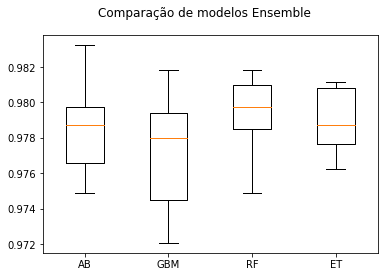

In [28]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

#### Quinta avaliação

Com os ensembles, o melhor modelo foi o Random Forest (Floresta Aleatória), e ainda melhor do que o SVM com parâmetros C = 1.3 e kernel = 'rbf'

### Criação e avaliação dos modelos de ensembles com dados padronizados e normalizados

Serão testados os ensembles com padronização e normalização na tentativa de melhora do mesmo do resultado do Random Forest


In [29]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())]))) 
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.978489 (0.002550)
ScaledGBM: 0.977301 (0.003266)
ScaledRF: 0.979397 (0.001955)
ScaledET: 0.978908 (0.001733)


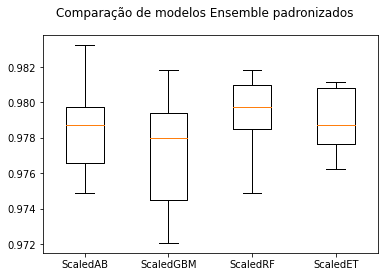

In [30]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble padronizados') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

In [32]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledMinMaxAB', Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostClassifier())]))) 
pipelines.append(('ScaledMinMaxGBM', Pipeline([('Scaler',MinMaxScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledMinMaxRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('ScaledMinMaxET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledMinMaxAB: 0.978489 (0.002550)
ScaledMinMaxGBM: 0.977231 (0.003175)
ScaledMinMaxRF: 0.979327 (0.002075)
ScaledMinMaxET: 0.978908 (0.001733)


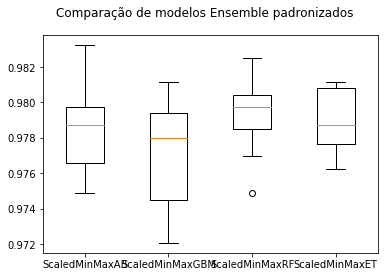

In [33]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble padronizados') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

#### Sexta avaliação

Modelos ensembles com padronização e normalização não obtiveram mudanças significativas em seus resultados, Random Forest com 10 estimadores foi o melhor método nessa avaliação

### Finalização do modelo

Método Ensemble RandomForest como o melhor com RF: 0.979397 (0.001955) com 10 estimadores

Modelo será treinado e fará a predição dos dados de treino (20%)

In [34]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(n_estimators=10)
model.fit(rescaledX, Y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.976536312849162
[[3208   26]
 [  58  288]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3234
         1.0       0.92      0.83      0.87       346

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



## Modelo com POO

Como escolhido o Random Forest, é necessária a criação de um projeto para apresentação dos resultados seguindo as boas práticas de engenharia de software. O projeto estará localizado na pasta `./pulsar_ml`

Criação dos arquivos `__init__.py` para inicialização da estrutura de pacotes

In [1]:
!touch pulsar_ml/__init__.py pulsar_ml/ml/__init__.py pulsar_ml/tests/__init__.py  

Criação da classe Loader responsável pela Coleta de dados

In [2]:
%%file pulsar_ml/ml/loader.py

import pandas

class Loader:
    
    def load_data(self, dataset_csv_file_path: str, attributes: list):
        """
        Responsible for loading the dataset

        Args:
            dataset_csv_file_path(str) : Dataset file path in the csv format
            attributes(list) : List containing attributes of the dataset to add to the Dataframe
        
        Returns:
            Dataframe
                A comma-separated values (csv) file is returned as two-dimensional data structure with labeled axes.
        """
        return pandas.read_csv(dataset_csv_file_path, names=attributes)


Overwriting pulsar_ml/ml/loader.py


Criação da classe PreProcessor responsável pelo pré-processamento de dados

In [3]:
%%file pulsar_ml/ml/pre_processor.py

from pandas import DataFrame
from sklearn.model_selection import train_test_split

class PreProcessor:
    
    def preprocess(self, dataset, test_size, seed=7):
        """ 
        Dataset instances preprocessing (train-test instances split)

        Args:
            dataset(Dataframe) : Dataset object
            test_size(float) : Test size percentage from total instances
            seed(int) : Seed value for idempotency random numbers
        
        Returns:
           X_train : Training instances list
           X_test : Testing instances list
           Y_train : Training labels list
           Y_test : Testing labels list
        """
        X_train, X_test, Y_train, Y_test = self.__prepare_holdout(dataset, test_size, seed)
        
        return (X_train, X_test, Y_train, Y_test)
    
    def __prepare_holdout(self, dataset: DataFrame, test_size: float, seed: int):
        """ 
        Dataset instances split using holdout method

        Args:
            dataset(Dataframe): Dataset object
            test_size(float): Test size percentage from total instances
            seed(int): Seed value for idempotency random numbers
        
        Returns:
           splitting : list, length=2 * len(arrays)
                List containing train-test split of inputs
        """
        array = dataset.values
        X = array[:, 0:-1]
        Y = array[:, -1]
        return train_test_split(X, Y, test_size=test_size, random_state=seed)


Overwriting pulsar_ml/ml/pre_processor.py


Criação da classe Model responsável pela modelagem e inferência

In [4]:
%%file pulsar_ml/ml/model.py

from sklearn.ensemble import RandomForestClassifier

class Model:

    def trainRandomForestClassifier(self, X_train: list, Y_train: list, number_of_estimators: int):
        """ 
        Random forest classifier model training

        Args:
            X_train(list): Training instances array
            Y_train(list): Training instances labels array
            number_of_estimators(int): Number of estimators

        Returns:
            self : object
                Fitted random forest classifier estimator
        """
        model = RandomForestClassifier(n_estimators=number_of_estimators)
        model.fit(X_train, Y_train)
        return model
    
    def predictRandomForestClassifier(self, model: object, X_test: list):
        """
        Random Forest Classifier prediction

        Args:
            model(object): Trained model
            X_test(list): Training instances array

        Returns:
            prediction : any
        """
        return model.predict(X_test)


Overwriting pulsar_ml/ml/model.py


Criação da classe Evaluator responsável pela apresentação dos resultados de acurácia, precisão e recall

In [5]:
%%file pulsar_ml/ml/evaluator.py


from sklearn.metrics import precision_score, recall_score, accuracy_score

class Evaluator:

    def evaluate_accuracy(self, prediction: any, Y_test: list):
        """ 
        Model prediction accuracy evaluation

        Args:
            prediction(any): Model prediction values
            Y_test(list): Testing instances labels array

        Returns:
            accuracy_score : float
                Model accuracy result
        """
        return accuracy_score(Y_test, prediction)

    def evaluate_precision(self, prediction: any, Y_test: list, average: str):
        """ 
        Model precision evaluation

        Args:
            prediction(any): Model prediction values
            Y_test(array): Testing instances labels array
            average(str): Label definition type

        Returns:
            precision_score : float
                Model recall result
        """
        return precision_score(Y_test, prediction, average=average)
    
    def evaluate_recall(self, prediction: any, Y_test: list, average: str):
        """ 
        Model recall evaluation

        Args:
            prediction(any): Model prediction values
            Y_test(array): Testing instances labels array
            average(str): Label definition type

        Returns:
            recall_score : float
                Model recall result
        """
        return recall_score(Y_test, prediction, average=average)

Overwriting pulsar_ml/ml/evaluator.py


Criação da classe Main responsável pela execução completa do projeto

In [10]:
%%file pulsar_ml/main.py

from pulsar_ml.ml.loader import Loader
from pulsar_ml.ml.pre_processor import PreProcessor
from pulsar_ml.ml.model import Model
from pulsar_ml.ml.evaluator import Evaluator
import joblib

def main():
    loader = Loader()
    preprocessor = PreProcessor()
    ml_model = Model()
    ml_evaluator = Evaluator()

    dataset_csv_path = 'HTRU_2.csv'
    attributes = [
        'mean',
        'standard_deviation',
        'excess_kurtosis',
        'skewness',
        'dm_snr_mean',
        'dm_snr_standard_deviation',
        'dm_snr_excess_kurtosis',
        'dm_snr_skewness',
        'class'
    ]
    test_size = 0.2

    pulsar_dataset = loader.load_data(dataset_csv_path, attributes)

    X_train, X_test, Y_train, Y_test = preprocessor.preprocess(pulsar_dataset, test_size)

    model = ml_model.trainRandomForestClassifier(X_train, Y_train, 10)

    predictions = ml_model.predictRandomForestClassifier(model, X_test)

    accuracy = ml_evaluator.evaluate_accuracy(predictions, Y_test)
    precision = ml_evaluator.evaluate_precision(predictions, Y_test, average='binary')
    recall = ml_evaluator.evaluate_recall(predictions, Y_test, average='binary')

    print("Accuracy: {}".format(accuracy))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))

    joblib.dump(model,"./model_pulsar.joblib")

main()

Overwriting pulsar_ml/main.py


In [11]:
%run pulsar_ml/main.py

Accuracy: 0.9773743016759776
Precision: 0.9206349206349206
Recall: 0.838150289017341


### Testes

Como todo bom projeto de engenharia de software, são necessários, no mínimo, testes unitários para avaliarmos a complexidade ciclomática e a lógica de negócio

Criação da classe IrisLoader responsável pela preparação do ambiente de testes do projeto. Basicamente pode carregar o dataset Iris, separar dados de treino e teste, treinar o modelo de Random Forest e fazer predições

In [43]:
%%file pulsar_ml/tests/iris_loader.py

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

class IrisLoader:

    def setup_dataset(self):
        iris = load_iris()
        dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
        dataset['target'] = iris.target
        
        return dataset

    def setup_test_train_set(self):
        dataset = self.setup_dataset()
        array = dataset.values
        X = array[:,0:4]
        Y = array[:,4]

        return train_test_split(X, Y, test_size=0.2, random_state=7)

    def setup_model(self, X_train, Y_train):
        model = RandomForestClassifier()
        model.fit(X_train, Y_train)
        
        return model

    def setup_prediction(self, X_train, X_test, Y_train):
        model = self.setup_model(X_train, Y_train)
        prediction = model.predict(X_test)
        
        return prediction


Overwriting pulsar_ml/tests/iris_loader.py


Criação do test para a classe Loader

In [46]:
%%file pulsar_ml/tests/test_loader.py

from pulsar_ml.ml.loader import Loader

def test_load_data():
    loader = Loader()

    file_path = './pulsar_ml/tests/test_dataset.csv'
    attributes = [
        'a',
        'b',
        'c',
        'd',
        'e',
        'f',
        'g',
        'h',
        'i'
    ]

    dataset = loader.load_data(file_path, attributes)

    assert len(dataset) == 5

Overwriting pulsar_ml/tests/test_loader.py


Criação do test para a classe PreProcessor

In [47]:
%%file pulsar_ml/tests/test_pre_processor.py

from pulsar_ml.ml.pre_processor import PreProcessor
from pulsar_ml.tests.iris_loader import IrisLoader
import pandas as pd

def test_preprocess():
    pre_processor = PreProcessor()
    iris = IrisLoader()

    iris_dataset = iris.setup_dataset()

    test_size = 0.2

    seed = 7

    X_train, X_test, Y_train, Y_test = pre_processor.preprocess(iris_dataset, test_size, seed)

    assert len(X_train) == (len(iris_dataset) * 0.8)
    assert len(X_test) == (len(iris_dataset) * 0.2)
    assert len(Y_train) == (len(iris_dataset) * 0.8)
    assert len(Y_test) == (len(iris_dataset) * 0.2)

Overwriting pulsar_ml/tests/test_pre_processor.py


Criação do test para a classe Model

In [48]:
%%file pulsar_ml/tests/test_model.py

from pulsar_ml.ml.model import Model
from pulsar_ml.tests.iris_loader import IrisLoader
from sklearn.ensemble import RandomForestClassifier

def test_ml_model_train():
    ml_model = Model()
    iris = IrisLoader()

    X_train, X_test, Y_train, Y_test = iris.setup_test_train_set()

    n_estimators = 10

    model = ml_model.trainRandomForestClassifier(X_train, Y_train, n_estimators)

    assert isinstance(model, RandomForestClassifier)

def test_ml_model_predict():
    ml_model = Model()
    iris = IrisLoader()
    
    X_train, X_test, Y_train, Y_test = iris.setup_test_train_set()

    model = iris.setup_model(X_train, Y_train)

    model_predicted = ml_model.predictRandomForestClassifier(model, X_test)

    assert isinstance(model_predicted, object)


Overwriting pulsar_ml/tests/test_model.py


Criação do test para a classe Evaluator

In [49]:
%%file pulsar_ml/tests/test_evaluator.py

from pulsar_ml.ml.evaluator import Evaluator
from pulsar_ml.tests.iris_loader import IrisLoader

def prediction_setup_before():
    iris = IrisLoader()

    X_train, X_test, Y_train, Y_test = iris.setup_test_train_set()

    prediction = iris.setup_prediction(X_train, X_test, Y_train)

    return prediction, Y_test

def test_ml_evaluator_accuracy():
    ml_evaluator = Evaluator()

    prediction, Y_test = prediction_setup_before()

    accuracy = ml_evaluator.evaluate_accuracy(prediction, Y_test)
    assert isinstance(accuracy, float)

def test_ml_evaluator_precision():
    ml_evaluator = Evaluator()

    prediction, Y_test = prediction_setup_before()

    precision = ml_evaluator.evaluate_precision(prediction, Y_test, average=None)
    
    assert isinstance(precision, object)

def test_ml_evaluator_recall():
    ml_evaluator = Evaluator()

    prediction, Y_test = prediction_setup_before()

    recall = ml_evaluator.evaluate_recall(prediction, Y_test, average=None)
    
    assert isinstance(recall, object)

Overwriting pulsar_ml/tests/test_evaluator.py


In [50]:
!pytest pulsar_ml/tests/*.py

Test session starts (platform: linux, Python 3.8.10, pytest 7.1.2, pytest-sugar 0.9.4)
rootdir: /home/ezimelewicz/projects/eduardo/INF2922-Software-Engineering-for-Data-Science/final_project
plugins: sugar-0.9.4
collecting ... 
 pulsar_ml/tests/test_evaluator.py ✓✓✓                            43% ████▍     
 pulsar_ml/tests/test_loader.py ✓                                 57% █████▊    
 pulsar_ml/tests/test_model.py ✓✓                                 86% ████████▋ 
 pulsar_ml/tests/test_pre_processor.py ✓                         100% ██████████

Results (0.86s):
       7 passed
